# WIP code for downloading and transforming OPENSENSE example datasets 

## A universal function for downloading example data files 

In [1]:
def download_data_file(url, local_path='.', local_file_name=None, print_output=False):
    import os
    import urllib
    
    if not os.path.exists(local_path):
        if print_output:
            print(f'Creating path {local_path}')
        os.makedirs(local_path)
    
    if local_file_name is None:
        local_file_name = url.split('/')[-1]
    
    if os.path.exists(os.path.join(local_path, local_file_name)):
        print(f'File already exists at desired location {os.path.join(local_path, local_file_name)}')
        print('Not downloading!')
        return
    
    if print_output:
        print(f'Downloading {url}')
        print(f'to {local_path}/{local_file_name}')
        
    return_message = urllib.request.urlretrieve(url, os.path.join(local_path, local_file_name))
        

## Build some downloaders for specific datasets 

In [2]:
from functools import partial
download_pycomlink_example_data = partial(
    download_data_file,
    url='https://github.com/pycomlink/pycomlink/raw/master/pycomlink/io/example_data/example_cml_data.nc',
)

download_fencl_2021_Eband_data = partial(
    download_data_file,
    url='https://zenodo.org/record/5013463/files/Dataset_1.0.0.zip',
)

download_overeem_2019_large_CML_data_Netherlands = partial(
    download_data_file,
    url='https://data.4tu.nl/ndownloader/files/24025658',
    local_file_name='data.zip',
)

## Test the downloaders
Note that the Overeem 2019 dataset has approx 500MB, hence, it takes some time to download

In [3]:
download_pycomlink_example_data(local_path='pycomlink_example_data', print_output=True)

Creating path pycomlink_example_data
to pycomlink_example_data/example_cml_data.nc


In [4]:
download_fencl_2021_Eband_data(local_path='fencl_2021_Eband_data')

In [5]:
download_overeem_2019_large_CML_data_Netherlands(local_path='overeem_2019_large_CML_data_Netherlands')

In [6]:
ls -trlh

total 296
-rw-r--r--   1 chwala-c  901   1,5K  3 Mai 21:29 LICENSE
drwxr-xr-x  17 chwala-c  901   544B  3 Mai 21:32 pycomlink/
drwxr-xr-x  22 chwala-c  901   704B  3 Mai 21:43 RAINLINK/
-rw-r--r--   1 chwala-c  901   223B  3 Mai 22:26 README.md
-rw-r--r--   1 chwala-c  901   125K  4 Mai 22:47 intro_to_R.ipynb
-rw-r--r--   1 chwala-c  901   167B  5 Mai 09:34 environment.yml
drwxr-xr-x   3 chwala-c  901    96B  5 Mai 09:39 pycomlink_example_data/
drwxr-xr-x   3 chwala-c  901    96B  5 Mai 09:39 fencl_2021_Eband_data/
drwxr-xr-x   3 chwala-c  901    96B  5 Mai 09:40 overeem_2019_large_CML_data_Netherlands/
-rw-r--r--   1 chwala-c  901   7,8K  5 Mai 09:41 opensense_data_downloader_and_transformer.ipynb


In [7]:
ls -lh pycomlink_example_data/

total 10840
-rw-r--r--  1 chwala-c  901   5,3M  5 Mai 09:39 example_cml_data.nc


In [8]:
ls -lh fencl_2021_Eband_data/

total 12368
-rw-r--r--  1 chwala-c  901   5,9M  5 Mai 09:40 Dataset_1.0.0.zip


In [9]:
ls -lh overeem_2019_large_CML_data_Netherlands/

total 1179840
-rw-r--r--  1 chwala-c  901   562M  5 Mai 09:41 data.zip


# Open example NetCDF file 

In [10]:
import xarray as xr

ds_cml_pycomlink = xr.open_dataset('pycomlink_example_data/example_cml_data.nc')
ds_cml_pycomlink

<xarray.Dataset>
Dimensions:           (time: 15840, cml_id: 500, channel_id: 2)
Coordinates:
  * time              (time) datetime64[ns] 2018-05-10 ... 2018-05-20T23:59:00
  * cml_id            (cml_id) object 'FY0013_2_FY1257_3' ... 'SY8534_2_SY237...
    length            (cml_id) float64 ...
    site_a_latitude   (cml_id) float64 ...
    site_a_longitude  (cml_id) float64 ...
    site_b_latitude   (cml_id) float64 ...
    site_b_longitude  (cml_id) float64 ...
  * channel_id        (channel_id) object 'channel_1' 'channel_2'
    frequency         (cml_id, channel_id) float64 ...
    polarization      (cml_id, channel_id) object ...
Data variables:
    rsl               (channel_id, cml_id, time) float32 ...
    tsl               (channel_id, cml_id, time) float32 ...

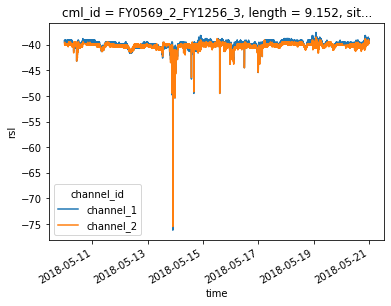

In [11]:
ds_cml_pycomlink.isel(cml_id=13).rsl.plot.line(x='time');

## Get data from ZIP files
as example we use the Overeem 2019 dataset

In [12]:
import zipfile
import pandas as pd

with zipfile.ZipFile('overeem_2019_large_CML_data_Netherlands/data.zip') as zfile:
    f = zfile.open('CMLs_20120530_20120901.dat')
    df2012 = pd.read_csv(
        f,
        nrows=1000000, # not reading the full file here to save time
        sep="\s+", 
        skiprows=1,   
        names=['frequency','datetime','pmin','pmax','pathlength','xstart','ystart','xend','yend','id'],
    )

# set correct date index
df2012 = df2012.set_index(pd.to_datetime(df2012['datetime'], format='%Y%m%d%H%M'))

In [13]:
df2012.head()

,frequency,datetime,pmin,pmax,pathlength,xstart,ystart,xend,yend,id
datetime,,,,,,,,,,
2012-05-30 00:15:00,37.978,201205300015,-49,-48,0.96381,5.91156,51.98303,5.92423,51.98675,952
2012-05-30 00:15:00,38.003,201205300015,-53,-53,5.43232,5.88453,52.12453,5.95620,52.10362,953
2012-05-30 00:15:00,39.263,201205300015,-56,-55,2.14079,5.72408,52.02102,5.75525,52.02030,954
2012-05-30 00:15:00,38.003,201205300015,-56,-56,1.28193,6.09943,52.04319,6.09032,52.05325,958
2012-05-30 00:15:00,37.978,201205300015,-44,-43,3.67305,6.05354,52.02008,6.08431,51.99307,957


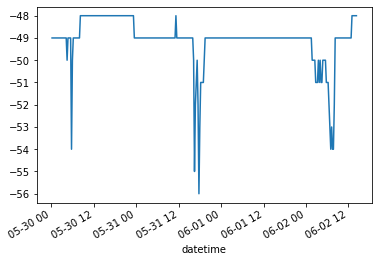

In [14]:
df2012_one_cml = df2012[df2012.id==df2012.id[0]]
df2012_one_cml.pmin.plot();